In [14]:
# Importing EdgeSimPy components and its built-in libraries (NetworkX and MessagePack)
import matplotlib.pyplot as plt
import networkx as nx

from edge_sim_py.components import *
from edge_sim_py.dataset_generator.map import hexagonal_grid
from edge_sim_py.dataset_generator.network_switches import sample_switch
from edge_sim_py.dataset_generator.network_topologies import partially_connected_fullduplex_hexagonal_mesh


from plot_topology import plot_topology
from conftest import _servers_base_station, _services_processing, reset_components

In [15]:
class DummySchedule:
    def __init__(self):
        self.steps = 0
        self.agents = []

    def remove(self, agent):
        self.agents.remove(agent)


class DummyModel:
    def __init__(self):
        self.schedule = DummySchedule()
        self.topology = None
        self.network_flow_scheduling_algorithm = max_min_fairness

    def initialize_agent(self, agent):
        self.schedule.agents.append(agent)
        agent.model = self


def dummy_model():
    return DummyModel()

In [16]:
def plot_small_app_2_user_4_services():
    map_coordinates = hexagonal_grid(x_size=3, y_size=3)

    for coordinates in map_coordinates:

        base_station = BaseStation()
        base_station.wireless_delay = 0
        base_station.coordinates = coordinates

        network_switch = sample_switch()
        base_station._connect_to_network_switch(network_switch=network_switch)

    partially_connected_fullduplex_hexagonal_mesh(
        network_nodes=NetworkSwitch.all(),
        link_specifications=[
            {"number_of_objects": 16, "delay": 1, "bandwidth": 10},
        ],
    )

    # Creating the Edge Server
    _servers_base_station(number_of_servers=4)

    # Creating the services
    services = _services_processing(number_of_services=4)

    # Assigning the services to the edge servers
    for server, service in zip(EdgeServer.all(), services):
        server.services.append(service)
        service.server = server

    # Creating the user 1
    user1 = User()
    user1.set_packet_size_strategy(mode="fixed", size=20)
    user1._set_initial_position(coordinates=(0, 0))

    # Creating the user 1
    user2 = User()
    user2.set_packet_size_strategy(mode="fixed", size=20)
    user2._set_initial_position(coordinates=(4, 0))

    # Creating the application
    app1 = Application()
    ordered_services = sorted(services, key=lambda s: s.id)
    for service in ordered_services:
        app1.connect_to_service(service=service)

    app2 = Application()
    descending_services = sorted(services, key=lambda s: s.id, reverse=True)
    for service in descending_services:
        app2.connect_to_service(service=service)

    user1._connect_to_application(app=app1, delay_sla=10)
    user2._connect_to_application(app=app2, delay_sla=10)

    plot_topology()

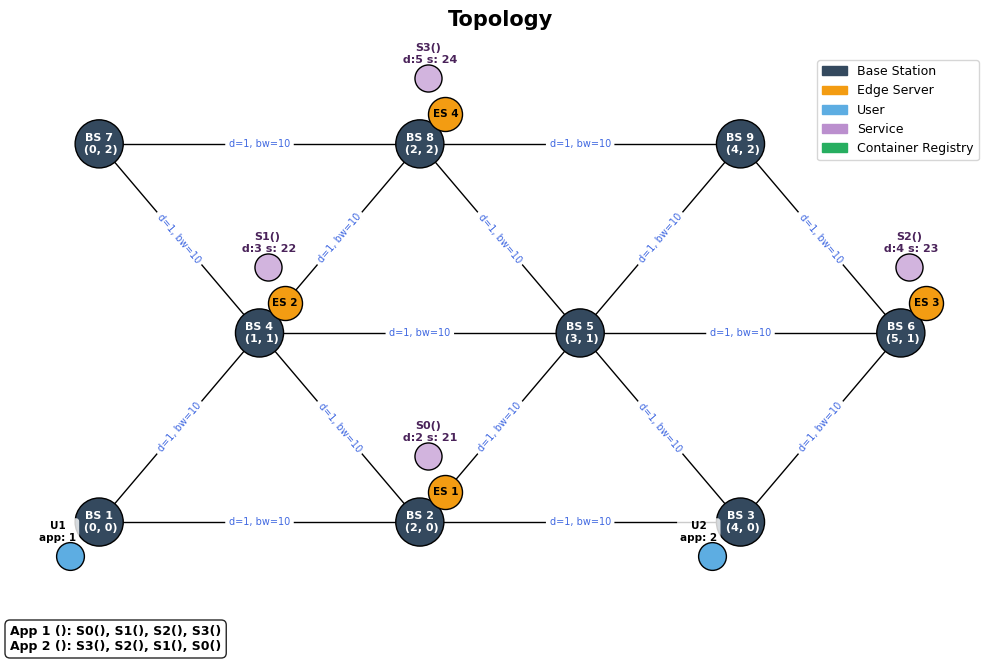

In [17]:
reset_components()
plot_small_app_2_user_4_services()

In [18]:
def plot_small_app_2_user_4_services_provision():
    map_coordinates = hexagonal_grid(x_size=3, y_size=3)

    for coordinates in map_coordinates:

        base_station = BaseStation()
        base_station.wireless_delay = 0
        base_station.coordinates = coordinates

        network_switch = sample_switch()
        base_station._connect_to_network_switch(network_switch=network_switch)

    topology = partially_connected_fullduplex_hexagonal_mesh(
        network_nodes=NetworkSwitch.all(),
        link_specifications=[
            {"number_of_objects": 16, "delay": 1, "bandwidth": 10},
        ],
    )

    # Creating the Edge Server
    _servers_base_station(number_of_servers=4)

    # Creating the services
    services = _services_processing(number_of_services=4)

    # Container image
    image1 = ContainerImage(
        obj_id=1,
        name="alpine",
        tag="",
        digest="sha256:a777c9c66ba177ccfea23f2a216ff6721e78a662cd17019488c417135299cd89",
        layers=["sha256:df9b9388f04ad6279a7410b85cedfdcb2208c0a003da7ab5613af71079148139"],
        architecture="",
    )

    image1.server = EdgeServer.all()[3]
    EdgeServer.all()[3].container_images.append(image1)

    # Container layer
    layer1 = ContainerLayer(
        obj_id=1, digest="sha256:df9b9388f04ad6279a7410b85cedfdcb2208c0a003da7ab5613af71079148139", size=2, instruction="ADD file:5d673d25da3a14ce1f6cf"
    )

    layer1.server = EdgeServer.all()[3]
    EdgeServer.all()[3].container_layers.append(layer1)

    # Container registry
    registry = ContainerRegistry(obj_id=1, cpu_demand=1, memory_demand=1024)

    registry.server = EdgeServer.all()[3]
    EdgeServer.all()[3].container_registries.append(registry)

    # Creating the user 1
    user1 = User()
    user1.set_packet_size_strategy(mode="fixed", size=20)
    user1._set_initial_position(coordinates=(0, 0))

    # Creating the user 1
    user2 = User()
    user2.set_packet_size_strategy(mode="fixed", size=20)
    user2._set_initial_position(coordinates=(4, 0))

    # Creating the application
    app1 = Application()
    ordered_services = sorted(services, key=lambda s: s.id)
    for service in ordered_services:
        app1.connect_to_service(service=service)

    app2 = Application()
    descending_services = sorted(services, key=lambda s: s.id, reverse=True)
    for service in descending_services:
        app2.connect_to_service(service=service)

    user1._connect_to_application(app=app1, delay_sla=10)
    user2._connect_to_application(app=app2, delay_sla=10)

    # Creating the model
    dummy_model = DummyModel()
    dummy_model.topology = topology

    topology.model = dummy_model
    for app in [app1, app2]:
        app.model = dummy_model
    for user in [user1, user2]:
        user.model = dummy_model
    for service in services:
        service.model = dummy_model

    plot_topology()

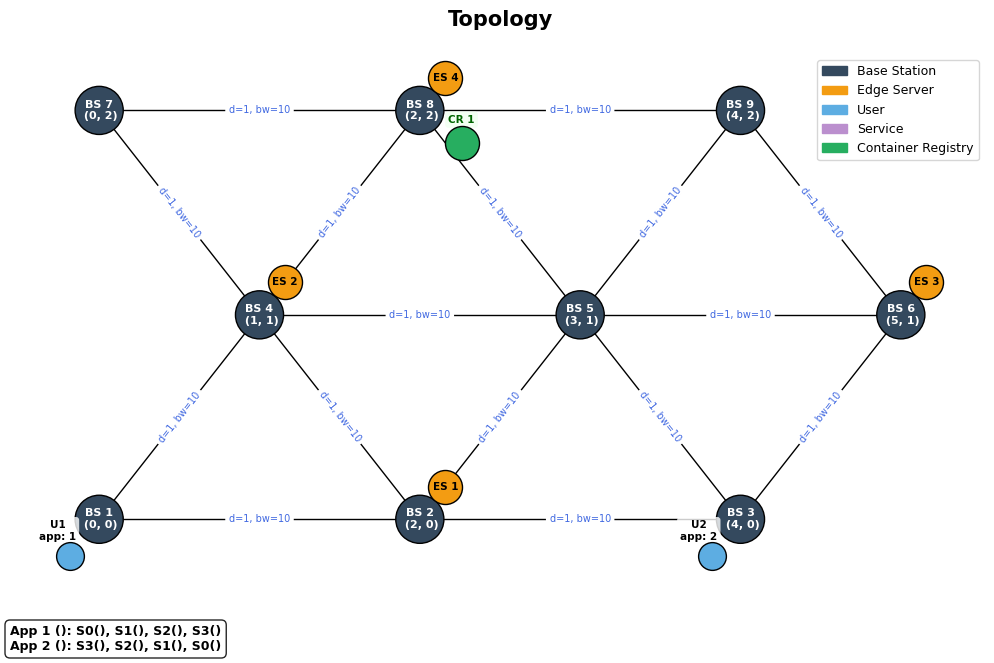

In [19]:
reset_components()
plot_small_app_2_user_4_services_provision()